1. IMPORT ALL NECESSARY PACKAGES

In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

2. LOAD THE DATASET AND VISUALIZE FEW SAMPLES

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


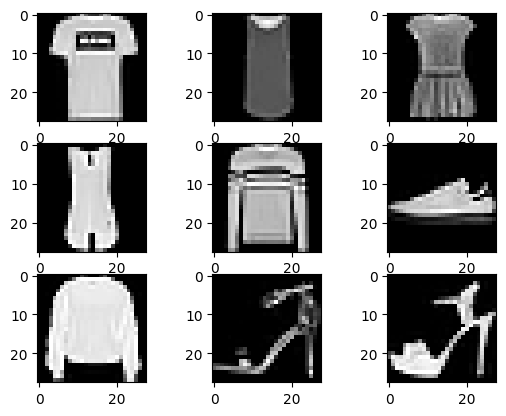

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap='grey')
plt.show()

3. DATA PREPROCESSING

In [3]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)
trainX = trainX / 255.0
testX = testX / 255.0
print(trainX.shape)

(60000, 28, 28, 1)


4. MODEL ARCHITECTURE DEFINITION AND TRAINING

In [4]:
model_path = "fashion_mnist_model.keras"
if os.path.exists(model_path):
    print("Loading saved model...")
    model = load_model(model_path)
    
else:
    print("No saved model found. Training a new model...")
    
    def model_arch():
        models = Sequential()
        models.add(Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)))
        models.add(MaxPooling2D(pool_size=(2, 2)))
        models.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
        models.add(MaxPooling2D(pool_size=(2, 2)))
        models.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
        models.add(MaxPooling2D(pool_size=(2, 2)))
        models.add(Flatten())
        models.add(Dense(256, activation="relu"))
        models.add(Dense(10, activation="softmax"))
        return models

    model = model_arch()
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    history = model.fit(
        trainX,
        trainy,
        batch_size = 32,
        epochs=10,
        steps_per_epoch=len(trainX) // 32,
        validation_split=0.2,
        
    )
    
    model.save(model_path)
    print(f"Model saved at {model_path}")

    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

Loading saved model...


5. MODEL EVALUATION

In [5]:
test_loss, test_accuracy = model.evaluate(testX, testy)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4046 - sparse_categorical_accuracy: 0.9084
Test Accuracy: 90.89%


6. TEST THE MODEL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Label: dress
Actual: dress


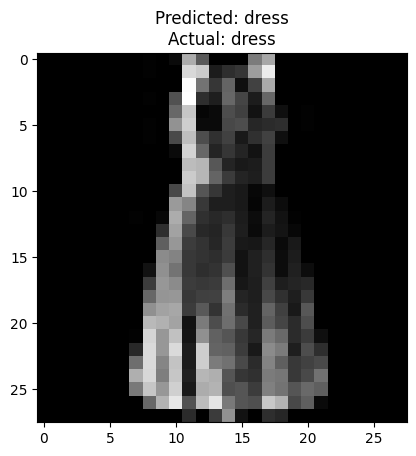

In [6]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

data = int(input("Enter Test Data Index:"))

true_label_index = testy[data]
true_label = labels[true_label_index]

predictions = model.predict(testX[data:data+1])
label = labels[np.argmax(predictions)]
print("Predicted Label:", label)
print("Actual:", true_label)

plt.imshow(testX[data:data+1][0], cmap='grey')
plt.title(f"Predicted: {label}\nActual: {true_label}")
plt.show()